In [1]:
# Change working directory to project root
import os
os.chdir("C:/Users/saksh/Downloads/Cyberattack-Detection-ML")

# Add the 'scripts' directory to the system path
import sys
scripts_path = os.path.abspath("scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Now import functions from preprocess.py
from preprocess import load_and_merge_csv, clean_and_select_features

Import Required Libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Load and Prepare the Data

In [10]:
df = load_and_merge_csv("data")
X, y = clean_and_select_features(df)

Train/Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Scale the Data

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Encode Target Labels

In [13]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

Train MLP Model

In [14]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=42,
    verbose=True
)

mlp_model.fit(X_train_scaled, y_train_encoded)

Iteration 1, loss = 0.29101622
Iteration 2, loss = 0.14216591
Iteration 3, loss = 0.10996144
Iteration 4, loss = 0.09997121
Iteration 5, loss = 0.09308048
Iteration 6, loss = 0.08885587
Iteration 7, loss = 0.08629154
Iteration 8, loss = 0.08427134
Iteration 9, loss = 0.08306887
Iteration 10, loss = 0.08146986
Iteration 11, loss = 0.08042676
Iteration 12, loss = 0.07964530
Iteration 13, loss = 0.07869140
Iteration 14, loss = 0.07787327
Iteration 15, loss = 0.07723896
Iteration 16, loss = 0.07676776
Iteration 17, loss = 0.07603837
Iteration 18, loss = 0.07557666
Iteration 19, loss = 0.07508124
Iteration 20, loss = 0.07456476
Iteration 21, loss = 0.07415442
Iteration 22, loss = 0.07356472
Iteration 23, loss = 0.07306356
Iteration 24, loss = 0.07284817
Iteration 25, loss = 0.07245701
Iteration 26, loss = 0.07208571
Iteration 27, loss = 0.07188903
Iteration 28, loss = 0.07134574
Iteration 29, loss = 0.07149265
Iteration 30, loss = 0.07089784
Iteration 31, loss = 0.07075985
Iteration 32, los

c:\Users\saksh\Downloads\Cyberattack-Detection-ML\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, random_state=42,
              verbose=True)

Make Predictions

In [16]:
y_pred_encoded = mlp_model.predict(X_test_scaled)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

Evaluate the Model

In [17]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9716165466710044


c:\Users\saksh\Downloads\Cyberattack-Detection-ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saksh\Downloads\Cyberattack-Detection-ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                             precision    recall  f1-score   support

                    BENIGN       0.97      1.00      0.98    454265
                       Bot       0.93      0.37      0.53       391
                      DDoS       1.00      1.00      1.00     25605
             DoS GoldenEye       0.94      0.90      0.92      2059
                  DoS Hulk       0.99      0.72      0.84     46025
          DoS Slowhttptest       0.84      0.90      0.87      1100
             DoS slowloris       0.95      0.93      0.94      1159
               FTP-Patator       0.94      0.99      0.97      1587
                Heartbleed       0.67      1.00      0.80         2
              Infiltration       0.11      0.57      0.18         7
                  PortScan       0.98      0.99      0.99     31761
               SSH-Patator       0.98      0.52      0.68      1180
  Web Attack � Brute Force       0.61      0.07      0.13       301
Web Attack � Sql Injec

c:\Users\saksh\Downloads\Cyberattack-Detection-ML\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix

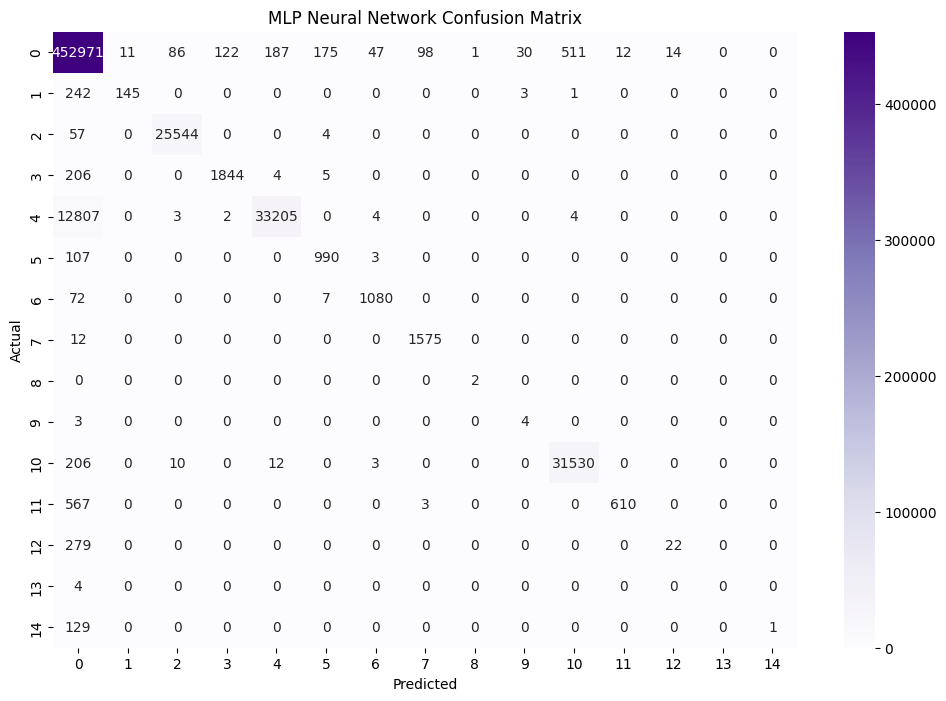

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("MLP Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()